In [2]:
# load libraries
import numpy as np
from numpy import arange
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [15]:
# Load dataset
filename = "boston_house_prices.csv"
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = read_csv(filename, names=names)

In [16]:
# shape
df.shape

(506, 14)

In [17]:
# types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [18]:
# head
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
# statistical descriptions
set_option("precision", 1)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


The features have a wide variety of scale. We'll need to transform them unto similar scales so that they can be useful for our predictive algorithms. First, let's see which features correlate with each other.

In [21]:
# correlation
set_option("precision", 2)
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


Many attributes have a strong correlation (eg > 0.70 or < -0.70); 

- INDUS & NOX: 0.76
- INDUS & DIS: -0.71
- INDUS & TAX: 0.72
- NOX & AGE: 0.73
- NOX & DIS: -0.77
- AGE & DIS: -0.75

# Visualizations

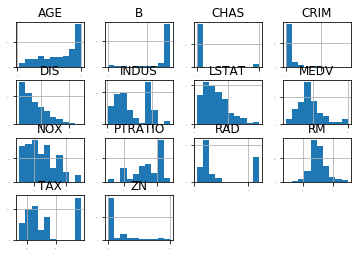

In [22]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

Some of these look like exponential distributions eg AGE and B while some like PTRATIO look like bimodal distributions.

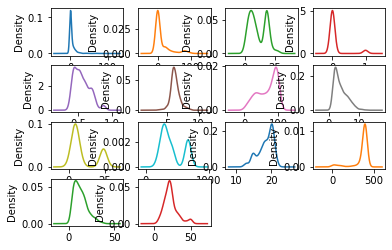

In [23]:
# density
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False)
plt.show()

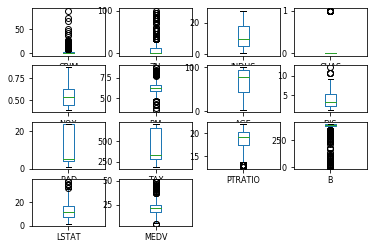

In [24]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
plt.show()

### Multimodal Data Visualizations

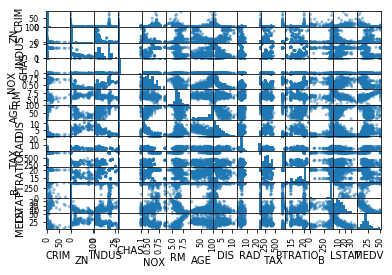

In [26]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

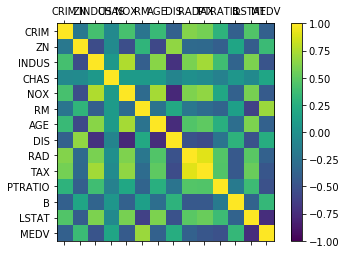

In [27]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation ='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

This correlation matrix looks easier on the eyes than the scatter matrix. Just look at the shade of the colors and you have an idea of the level of correlation between the features.

So far, we've discovered three things we could do to improve our model accuracy:

- feature selection; removing the most strongly correlated attributes
- normalizing the dataset to remove the effect of differing scales
- standardizing the dataset to reduce the effect of differing distributions (or, perhaps, not standardizing and seeing if that leads to a more accurate model)

Bonus:
- We could also discretize the data

In [28]:
## Creating the validation dataset
array = df.values
X = array[:, 0:13] 
Y = array[:, 13] #target feature
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
                                                        test_size=validation_size, random_state=seed)

## Evaluating the Algorithms

### First, our baseline

Since we do not know which algorithms will do well on this dataset, we have to go with our gut instinct and start with algorithms we think will give us a good baseline. Since housing prices are not random but rather follow discernabble patterns, we expect that regression algorithms and perhaps decision trees and SVM would do well. We'll check them out now.

We'll be using 10-fold cross-validation and algorithms will be evaluated using the Mean Squared Error (MSE) metric. A perfect algorithm (getting exactly zero predictions wrong) will score 0.

Side note: an important addition to the data would be the geographical location of each house. It would help calculate neighborhood premiums for houses with similar attributes but dissimilar prices and locations.

In [30]:
# Test options and ealuation metric
num_folds = 10
seed = 7
scoring = "neg_mean_squared_error"

In [29]:
# Spot - Check Algorithms

models = []
models.append(("LR", LinearRegression()))
models.append(("LASSO", Lasso()))
models.append(("EN", ElasticNet()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("CART", DecisionTreeRegressor()))
models.append(("SVR", SVR()))

In [31]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. 

CART: -26.136212 (12.346942)
SVR: -67.827886 (29.049138)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Results

LR has the lowest MSE, followed by CART and LASSO with a very thin margin between the latter two.

- LR: -21.379856 (9.414264)
- LASSO: -26.423561 (11.651110)
- EN: -27.502259 (12.305022)
- KNN: -41.896488 (13.901688)
- CART: -26.136212 (12.346942)
- SVR: -67.827886 (29.049138)

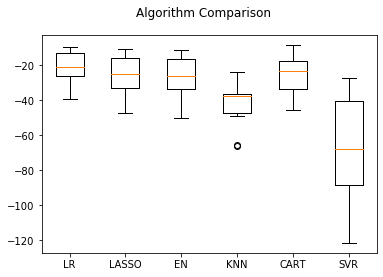

In [32]:
# Compare Algorithms by visualizing the differences in their performance
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Observation: SVR really looks like the worst performing algorithm for this problem, not just on average but for every single evaluation. The gap is too much.

Let's try standardizing the data and see if that improves the performancce of our algorithms.

### Standardization

In [34]:
# Standardize the dataset
pipelines = []
pipelines.append(("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LinearRegression())])))
pipelines.append(("ScaledLASSO", Pipeline([("Scaler", StandardScaler()), ("LASSO", Lasso())])))
pipelines.append(("ScaledEN", Pipeline([("Scaler", StandardScaler()), ("EN", ElasticNet())])))
pipelines.append(("ScaledKNN", Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsRegressor())])))
pipelines.append(("ScaledCART", Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeRegressor())])))
pipelines.append(("ScaledSVR", Pipeline([("Scaler", StandardScaler()), ("SVR", SVR())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. 

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -24.136077 (11.278270)
ScaledSVR: -29.633086 (17.009186)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


The scaling has drastically improved the performance of KNN so that it is the best-performing algorithm of the lot. SVR has also improved a whole lot.

- ScaledLR: -21.379856 (9.414264)
- ScaledLASSO: -26.607314 (8.978761)
- ScaledEN: -27.932372 (10.587490)
- ScaledKNN: -20.107620 (12.376949)
- ScaledCART: -24.136077 (11.278270)
- ScaledSVR: -29.633086 (17.009186)

Let's visualize the differences.

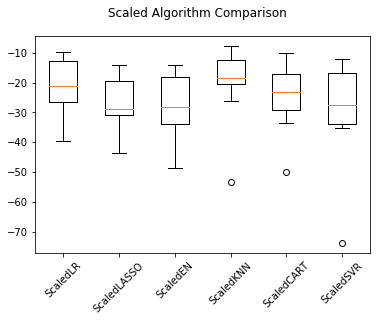

In [36]:
# Compare algorithms
fig = plt.figure()
fig.suptitle("Scaled Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45)
plt.show()

Given that KNN is the best-performing algorithm and KNN can be tuned, we would not be doing ourselves justice if we do not find out if the default value for number of neighbors (7) is in fact going to give us the best-performing case of KNN.

We will use a grid search to check different numbers of neighbors and see which one improves our algorithm. Each value of k will be ealuated using 10-fold cross validation on a standardized copy of the training dataset.

In [38]:
# KNN Algorithm Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors = k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


Indeed, another better value of k (k = 3) gives us a better result. 

- Best: -18.109304 using {'n_neighbors': 3}
    - 20.169640 (14.986904) with: {'n_neighbors': 1}
    - 18.109304 (12.880861) with: {'n_neighbors': 3}
    - 20.063115 (12.138331) with: {'n_neighbors': 5}
    - 20.514297 (12.278136) with: {'n_neighbors': 7}
    - 20.319536 (11.554509) with: {'n_neighbors': 9}
    - 20.963145 (11.540907) with: {'n_neighbors': 11}
    - 21.099040 (11.870962) with: {'n_neighbors': 13}
    - 21.506843 (11.468311) with: {'n_neighbors': 15}
    - 22.739137 (11.499596) with: {'n_neighbors': 17}
    - 23.829011 (11.277558) with: {'n_neighbors': 19}
    - 24.320892 (11.849667) with: {'n_neighbors': 21}

# Ensemble Methods

Now that we have been able to get the best algorithm for the group of algorithms we started with, we'll be taking a look at ensemble methods as a way to improve the performance of our algorithm.

In this session, we'll be looking at four ensemble methods:
    
    - Boosting Methods: AdaBoost(AB) and Gradient Boosting (GBM)
    - Bagging Methods: Random Forests (RF) and Extra Trees (ET)
    
We will use the same test harness, 10-fold validation and pipelines as before, using standardized data along the way.

In [39]:
# ensembles
ensembles = []
ensembles.append(("ScaledAB", Pipeline([("Scaler", StandardScaler()), ("AB", AdaBoostRegressor())])))
ensembles.append(("ScaledGBM", Pipeline([("Scaler", StandardScaler()), ("GBM", GradientBoostingRegressor())])))
ensembles.append(("ScaledRF", Pipeline([("Scaler", StandardScaler()), ("RF", RandomForestRegressor())])))
ensembles.append(("ScaledET", Pipeline([("Scaler", StandardScaler()), ("ET", ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB: -15.558428 (6.719213)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: -9.856900 (4.265129)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRF: -12.090625 (6.193001)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledET: -9.201573 (5.711223)


These are all better than any of the algorithms we've tried before and that's great news.

- ScaledAB: -15.558428 (6.719213)
- ScaledGBM: -9.856900 (4.265129)
- ScaledRF: -12.090625 (6.193001)
- ScaledET: -9.201573 (5.711223)

Let's visualize the distribution of scores across the cross-validation folds.

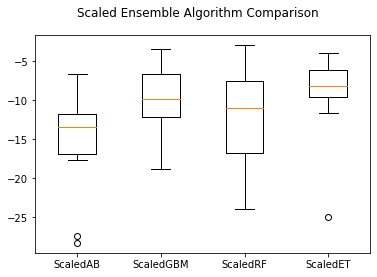

In [41]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like GBM has the best median score and without outliers. ET has a similar median score (with a better mean than GBM) but with an (?) outlier and a similar distribution to GBM.

## Ensemble Methods Tuning

### GBM Tuning

We can tune the GBM algorithm by, for example, adjusting the number of boosting stages. The default number of boosting stages (n_estimators) is 100. Often, the larger the number of stages, the better the performance though training time also increases. We'll define a parameter grid n_estimators values from 50 to 450 in increments of 50. Each setting is evaluated using 10-fold cross validation, as we've been doing all along.

In [44]:
# Tuning scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400,450]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -9.374163 using {'n_estimators': 450}
-10.813179 (4.856738) with {'n_estimators': 50}
-10.057375 (4.566986) with {'n_estimators': 100}
-9.718097 (4.404730) with {'n_estimators': 150}
-9.565306 (4.394355) with {'n_estimators': 200}
-9.477007 (4.376433) with {'n_estimators': 250}
-9.453795 (4.385228) with {'n_estimators': 300}
-9.394901 (4.367860) with {'n_estimators': 350}
-9.379670 (4.382001) with {'n_estimators': 400}
-9.374163 (4.394772) with {'n_estimators': 450}


Best: -9.374163 using {'n_estimators': 450}

    - 10.813179 (4.856738) with {'n_estimators': 50}
    - 10.057375 (4.566986) with {'n_estimators': 100}
    - 9.718097 (4.404730) with {'n_estimators': 150}
    - 9.565306 (4.394355) with {'n_estimators': 200}
    - 9.477007 (4.376433) with {'n_estimators': 250}
    - 9.453795 (4.385228) with {'n_estimators': 300}
    - 9.394901 (4.367860) with {'n_estimators': 350}
    - 9.379670 (4.382001) with {'n_estimators': 400}
    - 9.374163 (4.394772) with {'n_estimators': 450}

The best tuned GBM is about 0.5 units better than the default GBM gotten above. However, even the best GBM is worse than the default ET. Now, we tune the ET.

### ET Tuning



In [45]:
# Tuning scaled ET
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400,450]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -8.866017 using {'n_estimators': 200}
-9.859604 (5.606603) with: {'n_estimators': 50}
-9.217082 (5.340694) with: {'n_estimators': 100}
-8.918977 (5.220816) with: {'n_estimators': 150}
-8.866017 (5.202703) with: {'n_estimators': 200}
-8.914178 (5.197525) with: {'n_estimators': 250}
-8.925709 (5.187878) with: {'n_estimators': 300}
-8.950590 (5.192787) with: {'n_estimators': 350}
-8.981709 (5.232556) with: {'n_estimators': 400}
-8.984548 (5.267227) with: {'n_estimators': 450}


Best: -8.866017 using {'n_estimators': 200}

    -9.859604 (5.606603) with: {'n_estimators': 50}
    -9.217082 (5.340694) with: {'n_estimators': 100}
    -8.918977 (5.220816) with: {'n_estimators': 150}
    -8.866017 (5.202703) with: {'n_estimators': 200}
    -8.914178 (5.197525) with: {'n_estimators': 250}
    -8.925709 (5.187878) with: {'n_estimators': 300}
    -8.950590 (5.192787) with: {'n_estimators': 350}
    -8.981709 (5.232556) with: {'n_estimators': 400}
    -8.984548 (5.267227) with: {'n_estimators': 450}
    
The ET algorithm with n_estimators of 200 is the best algorithm we've found so far. We'll now use it to predict the prices of the test dataset.

# Testing our Algorithm

In [46]:
# prepare the best ET model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=200)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledX_val = scaler.transform(X_validation)
predictions = model.predict(rescaledX_val)
print(mean_squared_error(Y_validation, predictions))

13.81404784803921


In [47]:
# prepare the best ET model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=450)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledX_val = scaler.transform(X_validation)
predictions = model.predict(rescaledX_val)
print(mean_squared_error(Y_validation, predictions))

11.97173091098781


# Summary

The best model we could find is the Extra Trees Regressor (ensemble method) with an n_estimators value of 200. Its estimated mean square error is 11.9, close to our estimate of 8.8.

